<h2>Ridge Regression, Lasso Regression, Elastic Net, and Polynomial Regression</h2>

With California Housing Prices dataset

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('datasets/housing.csv')

In [5]:
df.dropna(subset=["total_bedrooms"], inplace=True)

df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)

X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train, y_train)
y_pred_elastic = elastic.predict(X_test)

poly = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=1.0))
])
poly.fit(X_train, y_train)
y_pred_poly = poly.predict(X_test)

In [9]:
from sklearn.model_selection import GridSearchCV

ridge_params = {'alpha': [0.01, 0.1, 1.0, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)

best_ridge = ridge_grid.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)
print("Best Ridge alpha:", ridge_grid.best_params_)

lasso_params = {'alpha': [0.01, 0.1, 1.0, 10]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train, y_train)

best_lasso = lasso_grid.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)
print("Best Lasso alpha:", lasso_grid.best_params_)

enet_params = {
    'alpha': [0.01, 0.1, 1.0],
    'l1_ratio': [0.2, 0.5, 0.8]
}
enet_grid = GridSearchCV(ElasticNet(), enet_params, cv=5, scoring='r2')
enet_grid.fit(X_train, y_train)

best_enet = enet_grid.best_estimator_
y_pred_elastic = best_enet.predict(X_test)
print("Best ElasticNet params:", enet_grid.best_params_)

Best Ridge alpha: {'alpha': 10}
Best Lasso alpha: {'alpha': 10}
Best ElasticNet params: {'alpha': 0.01, 'l1_ratio': 0.8}



--- Ridge Regression ---
MSE: 4802316143.289854
MAE: 50404.458346228945
R²: 0.6488297874504785

--- Lasso Regression ---
MSE: 4802197838.43338
MAE: 50411.55308024607
R²: 0.6488384385139141

--- ElasticNet Regression ---
MSE: 4803384810.214891
MAE: 50392.180591822005
R²: 0.6487516409936412

--- Polynomial Regression (Ridge, degree=2) ---
MSE: 3975919879.806865
MAE: 45042.29405038004
R²: 0.709260159553937


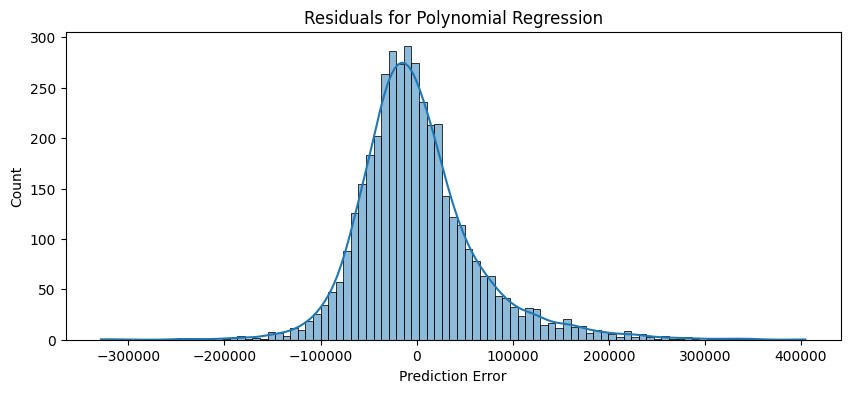

In [10]:
def evaluate(y_test, y_pred, label):
    print(f"\n--- {label} ---")
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("R²:", r2_score(y_test, y_pred))

evaluate(y_test, y_pred_ridge, "Ridge Regression")
evaluate(y_test, y_pred_lasso, "Lasso Regression")
evaluate(y_test, y_pred_elastic, "ElasticNet Regression")
evaluate(y_test, y_pred_poly, "Polynomial Regression (Ridge, degree=2)")

residuals = y_test - y_pred_poly
plt.figure(figsize=(10, 4))
sns.histplot(residuals, kde=True)
plt.title("Residuals for Polynomial Regression")
plt.xlabel("Prediction Error")
plt.show()

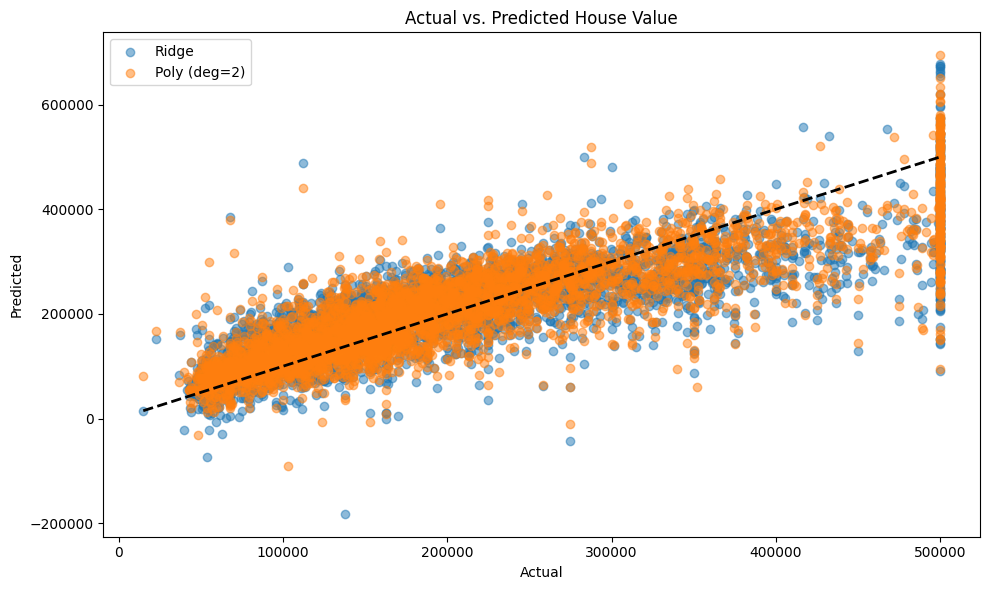

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, label="Ridge", alpha=0.5)
plt.scatter(y_test, y_pred_poly, label="Poly (deg=2)", alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.title("Actual vs. Predicted House Value")
plt.tight_layout()
plt.show()

<b>Key Insights</b>

    All linear models converge around the same performance limit, suggesting restricted linear separability in the original feature space.
    
    Polynomial regression (with Ridge regularization) significantly improves R² and reduces error by capturing non-linear patterns.

    The relationship between variables and housing value is non-linear.
    
    Regularization parameters (α, l1_ratio) had minimal effect on linear models in this dataset, indicating limited overfitting risk or sparsity benefits.
    
    Target variable (median_house_value) has a hard cap at 500,000, which may introduce bias or prediction saturation in upper range.